CNN 모델 구현

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('C:/Users/akasa/Downloads/diabetes.csv',index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


Text(0.5, 1.0, 'Diabetes')

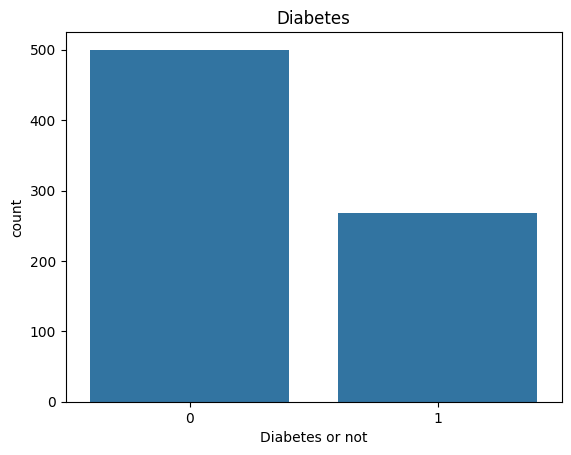

In [4]:
sns.countplot(data = df, x="Outcome")
plt.xlabel("Diabetes or not")
plt.ylabel("count")
plt.title("Diabetes")

In [5]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 1.0, 'Diabetes')

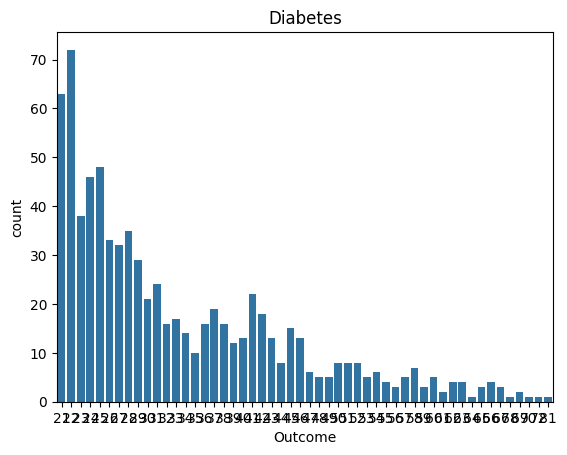

In [7]:
#주어진 데이터를 나이에 따라 두 집단으로 분류
sns.countplot(data = df, x="Age")
plt.xlabel("Outcome")
plt.ylabel("count")
plt.title("Diabetes")

In [8]:
#각 라벨의 이상치 탐지
from scipy import stats

z_score = np.abs(stats.zscore(df))
print(df.shape)

df = df[(z_score<3).all(axis=1)]
print(df.shape)

(768, 8)
(692, 8)


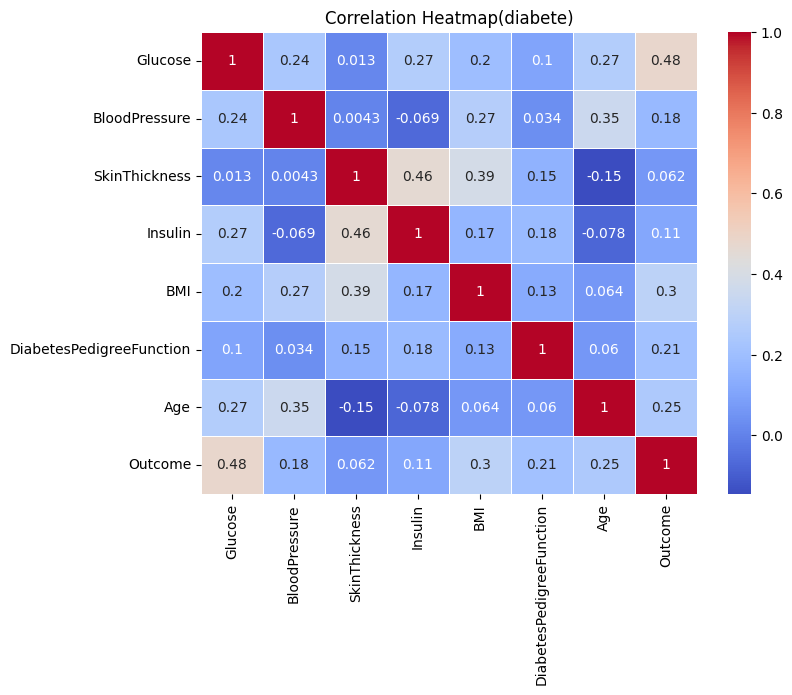

In [9]:
# 상관계수 계산
correlation_matrix = df.corr()

# Heatmap 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap(diabete)')
plt.show()

In [10]:
#상관률이 높은 Glucose 제외
#df = df.drop('Glucose',axis=1)

In [11]:
#당뇨병을 기준으로 데이터 분리
df_young = df[df['Age'] <= 30]
df_old = df[df['Age'] > 30]
print(df_young)
print(df_old)

             Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Pregnancies                                                         
1                 89             66             23       94  28.1   
5                116             74              0        0  25.6   
3                 78             50             32       88  31.0   
4                110             92              0        0  37.6   
3                126             88             41      235  39.3   
...              ...            ...            ...      ...   ...   
1                106             76              0        0  37.5   
2                 88             58             26       16  28.4   
2                122             70             27        0  36.8   
5                121             72             23      112  26.2   
1                 93             70             31        0  30.4   

             DiabetesPedigreeFunction  Age  Outcome  
Pregnancies                                     

In [12]:
print(df_young.shape)
print(df_old.shape)

(373, 8)
(319, 8)


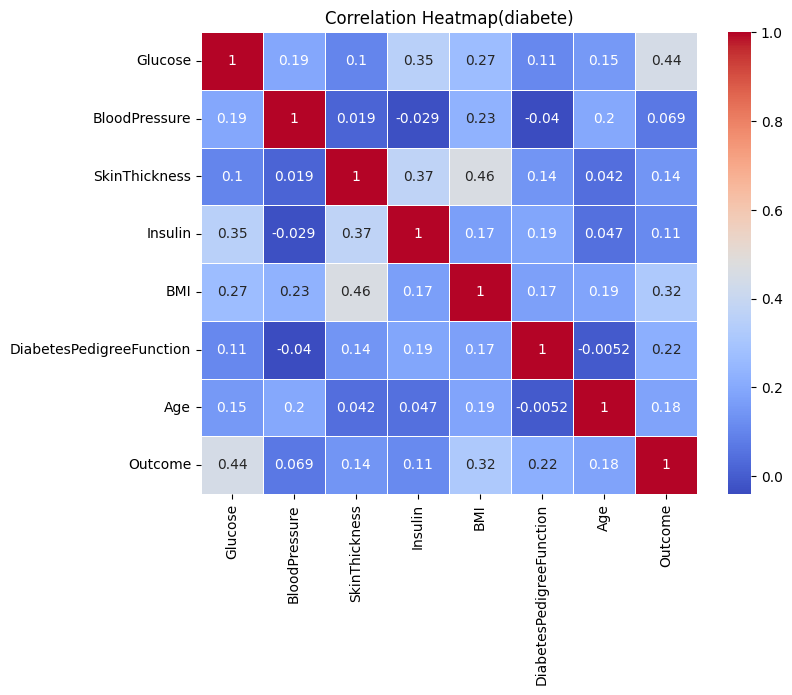

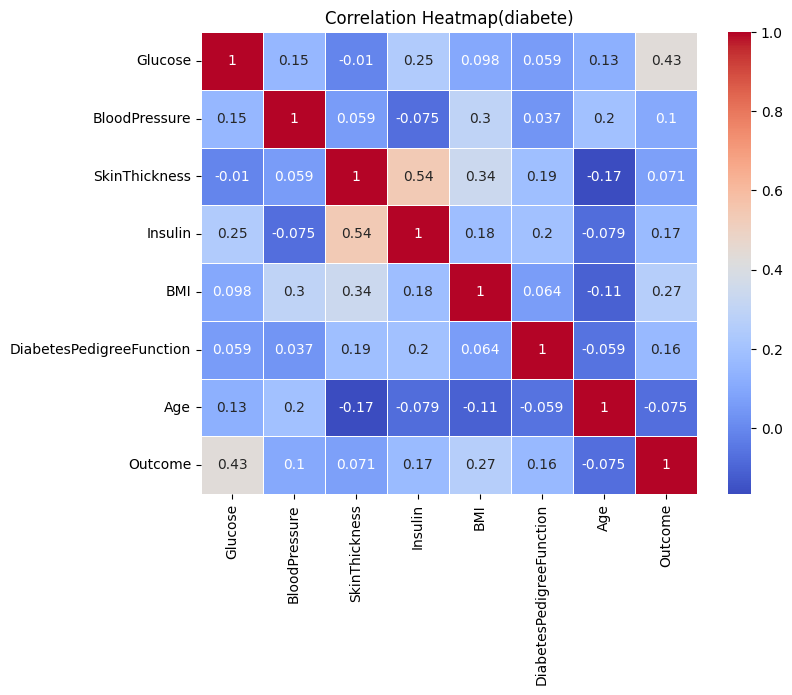

In [13]:
# 상관계수 계산
correlation_matrix = df_young.corr()

# Heatmap 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap(diabete)')
plt.show()

# 상관계수 계산
correlation_matrix = df_old.corr()

# Heatmap 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap(diabete)')
plt.show()

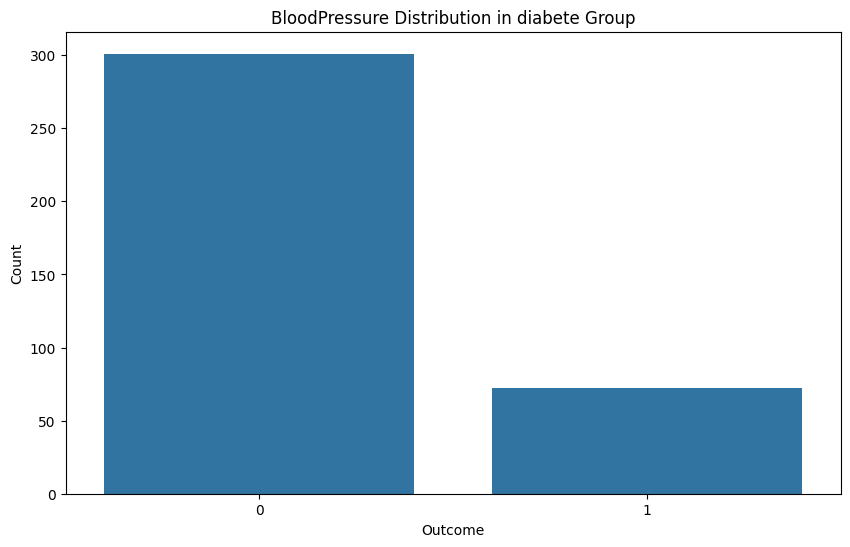

In [14]:
# younger 집단 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=df_young, x="Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("BloodPressure Distribution in diabete Group")
plt.show() 

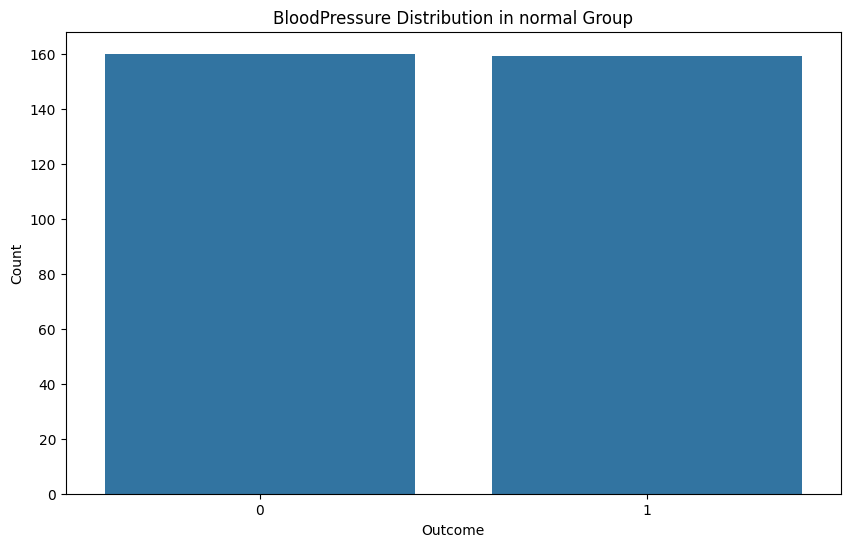

In [15]:
# older 집단 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=df_old, x="Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("BloodPressure Distribution in normal Group")
plt.show() 

In [16]:
# younger data 준비
younger_X = df_young.drop('Outcome', axis=1).values
younger_y = df_young['Outcome'].values

# 데이터셋 나누기
from sklearn.model_selection import train_test_split

younger_X_train, younger_X_temp, younger_y_train, younger_y_temp = train_test_split(
    younger_X, younger_y, test_size=0.2, random_state=42, stratify=younger_y
)

younger_X_test, younger_X_val, younger_y_test, younger_y_val = train_test_split(
    younger_X_temp, younger_y_temp, test_size=0.5, random_state=42,  stratify=younger_y_temp
)

# 데이터의 분포가 좀 차이가 나니 MinMaxScaler를 사용하여 스케일링 실시
from sklearn.preprocessing import MinMaxScaler

# 스케일러 생성
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# 훈련 데이터 스케일링
younger_X_train_scaled = scaler_x.fit_transform(younger_X_train)
younger_y_train_scaled = scaler_y.fit_transform(younger_y_train.reshape(-1, 1))

# 테스트 데이터 스케일링 (훈련 데이터로 fit한 스케일러 사용)
younger_X_test_scaled = scaler_x.transform(younger_X_test)
younger_y_test_scaled = scaler_y.transform(younger_y_test.reshape(-1, 1))

# 검증 데이터 스케일링
younger_X_val_scaled = scaler_x.transform(younger_X_val)
younger_y_val_scaled = scaler_y.transform(younger_y_val.reshape(-1, 1))

# 결과 확인
print(younger_X_train_scaled[0])
print(younger_y_train_scaled[0])
print(younger_X_test_scaled[0])
print(younger_y_test_scaled[0])
print(younger_X_val_scaled[0])
print(younger_y_val_scaled[0])

import joblib

# 스케일러 저장
joblib.dump(scaler_x, 'scaler_x.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')


[0.54929577 0.30434783 0.35714286 0.70120482 0.22282609 0.20868241
 0.        ]
[0.]
[0.49295775 0.63043478 0.73214286 0.56626506 0.57336957 0.47677075
 0.66666667]
[0.]
[0.46478873 0.23913043 0.76785714 0.38072289 0.48913043 0.56207159
 0.77777778]
[0.]


['scaler_y.pkl']

In [17]:
# old data 준비
old_X = df_old.drop('Outcome', axis=1).values
old_y = df_old['Outcome'].values

# 데이터셋 나누기
from sklearn.model_selection import train_test_split

old_X_train, old_X_temp, old_y_train, old_y_temp = train_test_split(
    old_X, old_y, test_size=0.2, random_state=42, stratify=old_y
)

old_X_test, old_X_val, old_y_test, old_y_val = train_test_split(
    old_X_temp, old_y_temp, test_size=0.5, random_state=42,  stratify=old_y_temp
)

# 데이터의 분포가 좀 차이가 나니 MinMaxScaler를 사용하여 스케일링 실시
from sklearn.preprocessing import MinMaxScaler

# 스케일러 생성
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# 훈련 데이터 스케일링
old_X_train_scaled = scaler_x.fit_transform(old_X_train)
old_y_train_scaled = scaler_y.fit_transform(old_y_train.reshape(-1, 1))

# 테스트 데이터 스케일링 (훈련 데이터로 fit한 스케일러 사용)
old_X_test_scaled = scaler_x.transform(old_X_test)
old_y_test_scaled = scaler_y.transform(old_y_test.reshape(-1, 1))

# 검증 데이터 스케일링
old_X_val_scaled = scaler_x.transform(old_X_val)
old_y_val_scaled = scaler_y.transform(old_y_val.reshape(-1, 1))

# 결과 확인
print(old_X_train_scaled[0])
print(old_y_train_scaled[0])
print(old_X_test_scaled[0])
print(old_y_test_scaled[0])
print(old_X_val_scaled[0])
print(old_y_val_scaled[0])

import joblib

# 스케일러 저장
joblib.dump(scaler_x, 'scaler_x.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')


[0.73202614 0.5625     0.         0.         0.94407895 0.11183733
 0.02702703]
[1.]
[0.66013072 0.625      0.90196078 0.32338308 0.60197368 0.40159768
 0.24324324]
[1.]
[0.88888889 0.75       0.50980392 0.2238806  0.55592105 0.16702977
 0.10810811]
[1.]


['scaler_y.pkl']

In [18]:
# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(np.isnan(younger_X_train_scaled).sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(younger_X_train_scaled).sum())

# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(np.isnan(younger_y_train_scaled).sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(younger_y_train_scaled).sum())

# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(np.isnan(younger_X_test_scaled).sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(younger_X_test_scaled).sum())

# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(np.isnan(younger_y_test_scaled).sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(younger_y_test_scaled).sum())

# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(np.isnan(younger_X_val_scaled).sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(younger_X_val_scaled).sum())

# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(np.isnan(younger_y_val_scaled).sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(younger_y_val_scaled).sum())


# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(np.isnan(old_X_train_scaled).sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(old_X_train_scaled).sum())

# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(np.isnan(old_y_train_scaled).sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(old_y_train_scaled).sum())

# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(np.isnan(old_X_test_scaled).sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(old_X_test_scaled).sum())

# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(np.isnan(old_y_test_scaled).sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(old_y_test_scaled).sum())

# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(np.isnan(younger_X_val_scaled).sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(younger_X_val_scaled).sum())

# NaN 값 확인
print("데이터에 NaN이 있는지 확인:")
print(np.isnan(younger_y_val_scaled).sum())

# Inf 값 확인
print("데이터에 무한대 값이 있는지 확인:")
print(np.isinf(younger_y_val_scaled).sum())

데이터에 NaN이 있는지 확인:
0
데이터에 무한대 값이 있는지 확인:
0
데이터에 NaN이 있는지 확인:
0
데이터에 무한대 값이 있는지 확인:
0
데이터에 NaN이 있는지 확인:
0
데이터에 무한대 값이 있는지 확인:
0
데이터에 NaN이 있는지 확인:
0
데이터에 무한대 값이 있는지 확인:
0
데이터에 NaN이 있는지 확인:
0
데이터에 무한대 값이 있는지 확인:
0
데이터에 NaN이 있는지 확인:
0
데이터에 무한대 값이 있는지 확인:
0
데이터에 NaN이 있는지 확인:
0
데이터에 무한대 값이 있는지 확인:
0
데이터에 NaN이 있는지 확인:
0
데이터에 무한대 값이 있는지 확인:
0
데이터에 NaN이 있는지 확인:
0
데이터에 무한대 값이 있는지 확인:
0
데이터에 NaN이 있는지 확인:
0
데이터에 무한대 값이 있는지 확인:
0
데이터에 NaN이 있는지 확인:
0
데이터에 무한대 값이 있는지 확인:
0
데이터에 NaN이 있는지 확인:
0
데이터에 무한대 값이 있는지 확인:
0


In [19]:
print(younger_X_train_scaled.shape)
print(younger_y_train_scaled.shape)
print(younger_X_test_scaled.shape)
print(younger_y_test_scaled.shape)
print(younger_X_val_scaled.shape)
print(younger_y_val_scaled.shape)

(298, 7)
(298, 1)
(37, 7)
(37, 1)
(38, 7)
(38, 1)


In [20]:
import numpy as np

# 시퀀스 생성 함수 정의

def create_sequences(data_X, data_y, window_size):
    sequences_X = []
    sequences_y = []
    for i in range(len(data_y) - window_size):
        _X = data_X[i : i + window_size]  # 입력 시퀀스 생성
        _y = data_y[i + window_size]      # 타겟 설정
        sequences_X.append(_X)
        sequences_y.append(_y)
    return np.array(sequences_X), np.array(sequences_y)

# 윈도우 크기 설정
window = 10

# 훈련 데이터 스케일링
younger_X_train_scaled = scaler_x.fit_transform(younger_X_train)
younger_X_test_scaled = scaler_x.transform(younger_X_test)
younger_X_val_scaled = scaler_x.transform(younger_X_val)

# 타겟 데이터는 스케일링하지 않음
younger_y_train_scaled = younger_y_train  # 0 또는 1
younger_y_test_scaled = younger_y_test
younger_y_val_scaled = younger_y_val

# 시퀀스 생성
younger_X_train_scaled_3d, younger_y_train_scaled_3d = create_sequences(younger_X_train_scaled, younger_y_train_scaled, window_size=window)
younger_X_test_scaled_3d, younger_y_test_scaled_3d = create_sequences(younger_X_test_scaled, younger_y_test_scaled, window_size=window)
younger_X_val_scaled_3d, younger_y_val_scaled_3d = create_sequences(younger_X_val_scaled, younger_y_val_scaled, window_size=window)

younger_y_train_scaled_3d = younger_y_train_scaled_3d.reshape(-1,1)
younger_y_test_scaled_3d = younger_y_test_scaled_3d.reshape(-1,1)
younger_y_val_scaled_3d = younger_y_val_scaled_3d.reshape(-1,1)

# 데이터 확인
print(f"Train data shape: {younger_X_train_scaled_3d.shape}, {younger_y_train_scaled_3d.shape}")
print(f"Test data shape: {younger_X_test_scaled_3d.shape}, {younger_y_test_scaled_3d.shape}")
print(f"Validation data shape: {younger_X_val_scaled_3d.shape}, {younger_y_val_scaled_3d.shape}")

Train data shape: (288, 10, 7), (288, 1)
Test data shape: (27, 10, 7), (27, 1)
Validation data shape: (28, 10, 7), (28, 1)


Class weights: {0: 0.6206896551724138, 1: 2.5714285714285716}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 32)            704       
                                                                 
 batch_normalization (BatchN  (None, 10, 32)           128       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 32)            0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 5, 32)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 16)             1552      
                                                            

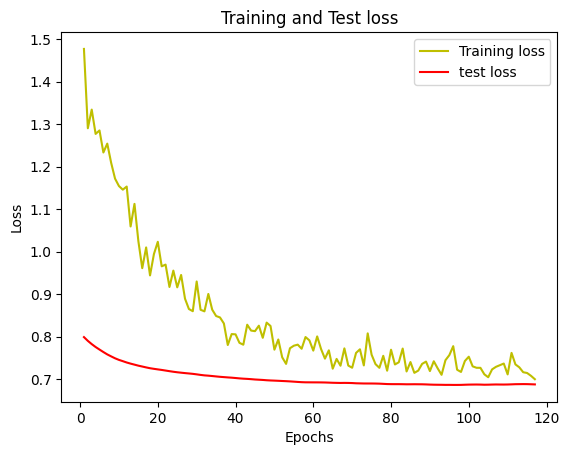

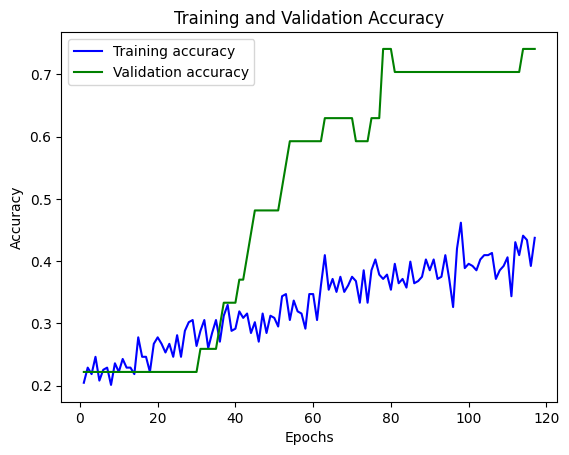

1/1 [==============================] - 0s 329ms/step
[[0.49797243]
 [0.49162874]
 [0.4994744 ]
 [0.487254  ]
 [0.4946215 ]
 [0.49538323]
 [0.49459422]
 [0.4978004 ]
 [0.5322876 ]
 [0.48212788]
 [0.50045776]
 [0.5095091 ]
 [0.4405104 ]
 [0.5120377 ]
 [0.49234957]
 [0.49810284]
 [0.532626  ]
 [0.5429159 ]
 [0.5441656 ]
 [0.5439678 ]
 [0.49920672]
 [0.48565054]
 [0.5129528 ]
 [0.5005095 ]
 [0.50561625]
 [0.46632496]
 [0.49811003]
 [0.48506564]]
Validation accuracy: 0.7037037014961243


INFO:tensorflow:Assets written to: base_model\assets


INFO:tensorflow:Assets written to: base_model\assets


In [21]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
import joblib
from tensorflow.keras.layers import BatchNormalization

# 조기 종료 세팅
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=20,
                               restore_best_weights=True)

# 클래스 불균형 가중치 설정
# 타겟 데이터가 0과 1로 나뉘므로, 학습 데이터를 기준으로 가중치를 계산
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(younger_y_train_scaled_3d),
                                     y=younger_y_train_scaled_3d.flatten())

class_weight_dict = dict(enumerate(class_weights))

# class_weight 출력해 확인
print(f"Class weights: {class_weight_dict}")

# model create, compile 및 fit
model = Sequential()

# 첫 번째 Conv1D 레이어
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same',
                 input_shape=(younger_X_train_scaled_3d.shape[1], younger_X_train_scaled_3d.shape[2])))
model.add(BatchNormalization())  # 배치 정규화 추가
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))  # 드롭아웃 추가

model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# 1차원 벡터로 변환 (Flatten)
model.add(Flatten())

# Dense 레이어 추가
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.2))  # 드롭아웃 추가

# 출력 레이어 (sigmoid 활성화 함수로 이진 분류)
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


# 모델 학습 (class_weight 추가)
history = model.fit(younger_X_train_scaled_3d,
                    younger_y_train_scaled_3d,
                    epochs=200,
                    batch_size=64,
                    validation_data=(younger_X_test_scaled_3d, younger_y_test_scaled_3d),
                    callbacks=[early_stopping],
                    class_weight=class_weight_dict)  # 클래스 가중치 적용

# 모델 평가
loss, acc = model.evaluate(younger_X_test_scaled_3d, younger_y_test_scaled_3d)

# 손실 그래프 시각화
loss = history.history['loss']
test_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, test_loss, 'r', label='test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프 시각화

epochs = range(1, len(loss) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 모델 예측 수행
pred = model.predict(younger_X_val_scaled_3d)

# 예측값 출력
print(pred)

# 검증 정확도 출력
print(f'Validation accuracy: {acc}')

# 모델 저장
model.save('base_model')


# old 데이터로 모델 불러와서 평가해보기

In [23]:
print(old_X_train_scaled.shape)
print(old_y_train_scaled.shape)
print(old_X_test_scaled.shape)
print(old_y_test_scaled.shape)
print(old_X_val_scaled.shape)
print(old_y_val_scaled.shape)

(255, 7)
(255, 1)
(32, 7)
(32, 1)
(32, 7)
(32, 1)


In [24]:
import numpy as np

# 시퀀스 생성 함수 정의

def create_sequences(data_X, data_y, window_size):
    sequences_X = []
    sequences_y = []
    for i in range(len(data_y) - window_size):
        _X = data_X[i : i + window_size]  # 입력 시퀀스 생성
        _y = data_y[i + window_size]      # 타겟 설정
        sequences_X.append(_X)
        sequences_y.append(_y)
    return np.array(sequences_X), np.array(sequences_y)

# 윈도우 크기 설정
window = 10

# 훈련 데이터 스케일링
old_X_train_scaled = scaler_x.fit_transform(old_X_train)
old_X_test_scaled = scaler_x.transform(old_X_test)
old_X_val_scaled = scaler_x.transform(old_X_val)

# 타겟 데이터는 스케일링하지 않음
old_y_train_scaled = old_y_train  # 0 또는 1
old_y_test_scaled = old_y_test
old_y_val_scaled = old_y_val

# 시퀀스 생성
old_X_train_scaled_3d, old_y_train_scaled_3d = create_sequences(old_X_train_scaled, old_y_train_scaled, window_size=window)
old_X_test_scaled_3d, old_y_test_scaled_3d = create_sequences(old_X_test_scaled, old_y_test_scaled, window_size=window)
old_X_val_scaled_3d, old_y_val_scaled_3d = create_sequences(old_X_val_scaled, old_y_val_scaled, window_size=window)

old_y_train_scaled_3d = old_y_train_scaled_3d.reshape(-1,1)
old_y_test_scaled_3d = old_y_test_scaled_3d.reshape(-1,1)
old_y_val_scaled_3d = old_y_val_scaled_3d.reshape(-1,1)

# 데이터 확인
print(f"Train data shape: {old_X_train_scaled_3d.shape}, {old_y_train_scaled_3d.shape}")
print(f"Test data shape: {old_X_test_scaled_3d.shape}, {old_y_test_scaled_3d.shape}")
print(f"Validation data shape: {old_X_val_scaled_3d.shape}, {old_y_val_scaled_3d.shape}")

Train data shape: (245, 10, 7), (245, 1)
Test data shape: (22, 10, 7), (22, 1)
Validation data shape: (22, 10, 7), (22, 1)


In [25]:
old_pred = model.evaluate(old_X_test_scaled_3d,old_y_test_scaled_3d)
print(old_pred)

1/1 [==============================] - 0s 63ms/step - loss: 0.7013 - accuracy: 0.4545
[0.7013326287269592, 0.4545454680919647]


In [26]:
#pretrain 및 fine tunninig 진행

In [27]:
import tensorflow as tf

base_loss,base_accuracy=model.evaluate(younger_X_train_scaled_3d,younger_y_train_scaled_3d)

model_file='base_model'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

9/9 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.5833


INFO:tensorflow:Assets written to: base_model\assets


INFO:tensorflow:Assets written to: base_model\assets


model saved at  base_model
Accuracy >58.333331
Base Loss >0.69


In [28]:
from tensorflow.keras.models import load_model

base_model = load_model('base_model')

base_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
base_model.evaluate(old_X_val_scaled_3d,old_y_val_scaled_3d)

1/1 [==============================] - 1s 851ms/step - loss: 0.6830 - accuracy: 0.4545


[0.6830335855484009, 0.4545454680919647]

In [29]:
base_model.evaluate(old_X_test_scaled_3d,old_y_test_scaled_3d)

1/1 [==============================] - 0s 37ms/step - loss: 0.7013 - accuracy: 0.4545


[0.7013326287269592, 0.4545454680919647]

In [30]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

# 새로운 모델을 정의
new_model = Sequential()

# 기존 모델을 추가
new_model.add(base_model)

# 새로운 완전연결층 추가
new_model.add(layers.Dense(64, activation='relu'))  # 중간에 완전연결층 추가

# 최종 출력층 추가 (예: 3개의 클래스)
new_model.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일 (다중 클래스 분류)
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

# 모델 요약 출력
new_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 1)                 2529      
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,722
Trainable params: 193
Non-trainable params: 2,529
_________________________________________________________________


In [31]:
history2 = new_model.fit(old_X_train_scaled_3d, old_y_train_scaled_3d, epochs = 100, batch_size = 64, validation_data = (old_X_test_scaled_3d,old_y_test_scaled_3d), shuffle = True,class_weight=class_weight_dict)

new_model.summary()

Epoch 1/100
4/4 [==============================] - 3s 184ms/step - loss: 1.1010 - accuracy: 0.4653 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 23ms/step - loss: 1.0781 - accuracy: 0.4898 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 0s 19ms/step - loss: 1.0563 - accuracy: 0.4898 - val_loss: 0.6958 - val_accuracy: 0.5000
Epoch 4/100
4/4 [==============================] - 0s 22ms/step - loss: 1.0385 - accuracy: 0.4898 - val_loss: 0.6971 - val_accuracy: 0.5000
Epoch 5/100
4/4 [==============================] - 0s 22ms/step - loss: 1.0208 - accuracy: 0.4898 - val_loss: 0.6988 - val_accuracy: 0.5000
Epoch 6/100
4/4 [==============================] - 0s 22ms/step - loss: 1.0056 - accuracy: 0.4898 - val_loss: 0.7008 - val_accuracy: 0.5000
Epoch 7/100
4/4 [==============================] - 0s 21ms/step - loss: 0.9883 - accuracy: 0.4898 - val_loss: 0.7032 - val_accuracy: 0.5000
Epoch 8/100
4/4 [==

In [32]:
new_model.evaluate(old_X_test_scaled_3d,old_y_test_scaled_3d)

1/1 [==============================] - 0s 56ms/step - loss: 0.8998 - accuracy: 0.5000


[0.8997776508331299, 0.5]

In [33]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [34]:
from sklearn.utils.class_weight import compute_class_weight

# 클래스 가중치 계산
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(old_y_train_scaled_3d),
                                     y=old_y_train_scaled_3d.flatten())

class_weight_dict = dict(enumerate(class_weights))

print(f"Class weights: {class_weight_dict}")

Class weights: {0: 0.98, 1: 1.0208333333333333}


In [35]:

import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.sequential.Sequential object at ...,sequential,True
1,<keras.layers.core.dense.Dense object at 0x000...,dense_2,True
2,<keras.layers.core.dense.Dense object at 0x000...,dense_3,True


In [36]:
history3 = new_model.fit(old_X_train_scaled_3d, old_y_train_scaled_3d, epochs = 100, batch_size = 64, validation_data = (old_X_test_scaled_3d,old_y_test_scaled_3d), shuffle = True,class_weight=class_weight_dict)

new_model.summary()

Epoch 1/100
4/4 [==============================] - 3s 193ms/step - loss: 0.9184 - accuracy: 0.4898 - val_loss: 0.8794 - val_accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 21ms/step - loss: 0.8876 - accuracy: 0.4898 - val_loss: 0.8606 - val_accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 0s 21ms/step - loss: 0.8611 - accuracy: 0.4898 - val_loss: 0.8431 - val_accuracy: 0.5000
Epoch 4/100
4/4 [==============================] - 0s 21ms/step - loss: 0.8327 - accuracy: 0.4898 - val_loss: 0.8262 - val_accuracy: 0.5000
Epoch 5/100
4/4 [==============================] - 0s 20ms/step - loss: 0.8205 - accuracy: 0.4898 - val_loss: 0.8088 - val_accuracy: 0.5000
Epoch 6/100
4/4 [==============================] - 0s 20ms/step - loss: 0.8059 - accuracy: 0.4898 - val_loss: 0.7918 - val_accuracy: 0.5000
Epoch 7/100
4/4 [==============================] - 0s 19ms/step - loss: 0.7868 - accuracy: 0.4898 - val_loss: 0.7763 - val_accuracy: 0.5000
Epoch 8/100
4/4 [==

In [74]:
new_model.evaluate(old_X_test_scaled_3d, old_y_test_scaled_3d)

1/1 [==============================] - 0s 88ms/step - loss: 0.6917 - accuracy: 0.5000


[0.6917024850845337, 0.5]